Data cleaning:

The steps involved are -
1. Check for Missing Values: Identify any columns with missing values.
2. Data Type Verification: Ensure that each column has the correct type.
3. Handle Missing Values: Decide whether to drop or fill missing values.
4. Check for Duplicates: Identify and remove duplicate entries.
5. Outlier Detection and Handling: Use Z-scores to filter out outliers in the amt column.
6. Ensure Correct Data Types: Convert categorical variables to appropriate types.
7. Create Derived Columns: Calculate age from date of birth and create age groups if not present.

In [27]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cleaned_fraud_data2.csv')
print(data.head())

# 1. Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Data Types Verification
print("Data Types:\n", data.dtypes)
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# 3. Handle Missing Values
# If there are any missing values, decide on a strategy (drop or fill)
data = data.dropna()  # Option: Drop rows with missing values

# 4. Check for Duplicates
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Number of duplicate rows: {duplicates}")
    data = data.drop_duplicates()

# 5. Outlier Detection and Handling
from scipy import stats
z_scores = stats.zscore(data['amt'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # Keeping entries within 3 standard deviations
data = data[filtered_entries]

# 6. Ensure Correct Data Types
data['gender'] = data['gender'].astype('category')
data['is_fraud'] = data['is_fraud'].astype('int')

# 7. Create Derived Columns (if necessary)
data['age'] = 2024 - pd.to_datetime(data['dob']).dt.year 

# Check if age groups exist; if not, create them
if 'age_group' not in data.columns:
    bins = [0, 18, 25, 35, 45, 55, 65, 100] 
    labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Final check of the cleaned dataset
print("Cleaned Data Summary:\n", data.describe())
print("Data Types After Cleaning:\n", data.dtypes)


  trans_date_trans_time  category     amt  gender  city_pop   dob  is_fraud  \
0   2019-01-01 00:00:18         8    4.97       0      3495  1988         0   
1   2019-01-01 00:00:44         4  107.23       0       149  1978         0   
2   2019-01-01 00:00:51         0  220.11       1      4154  1962         0   
3   2019-01-01 00:01:16         2   45.00       1      1939  1967         0   
4   2019-01-01 00:03:06         9   41.96       1        99  1986         0   

   trans_year  age  age_group  Region  is_weekend  day_period  trans_month  \
0           0   31          1       4           0           3            4   
1           0   41          2       0           0           3            4   
2           0   57          2       3           0           3            4   
3           0   52          2       3           0           3            4   
4           0   33          1       4           0           3            4   

   job_sector  
0           5  
1           1  
2       

summary statistics:

In [16]:
summary_stats = data.describe()

# Calculate fraud rate
fraud_rate = data['is_fraud'].mean()

Transaction Amount Distribution :
A histogram illustrates the distribution of transaction amounts.

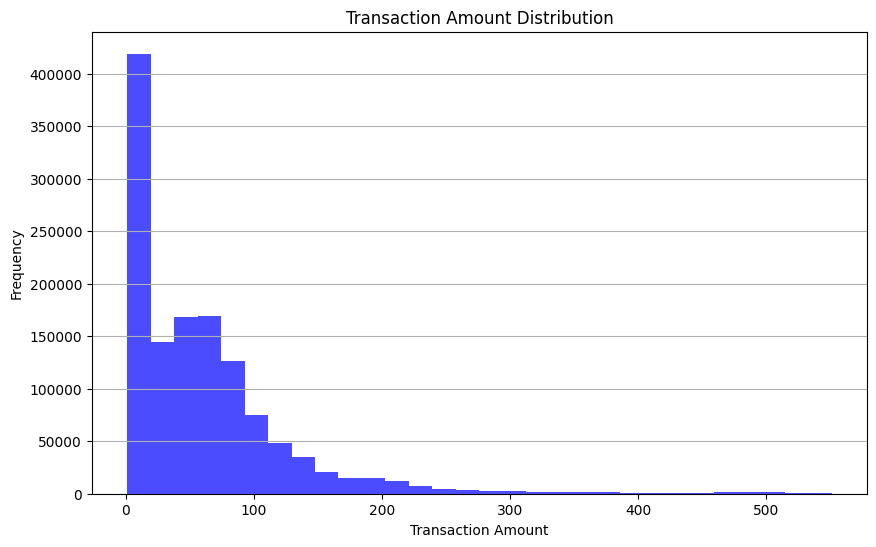

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['amt'], bins=30, color='blue', alpha=0.7)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Fraud Rate by Gender : 
A bar chart shows fraud rates by gender.

/var/folders/vk/swzbp2qj6rz0rvkz1l62nt4h0000gn/T/ipykernel_56019/1791254408.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_gender = data.groupby('gender')['is_fraud'].mean()


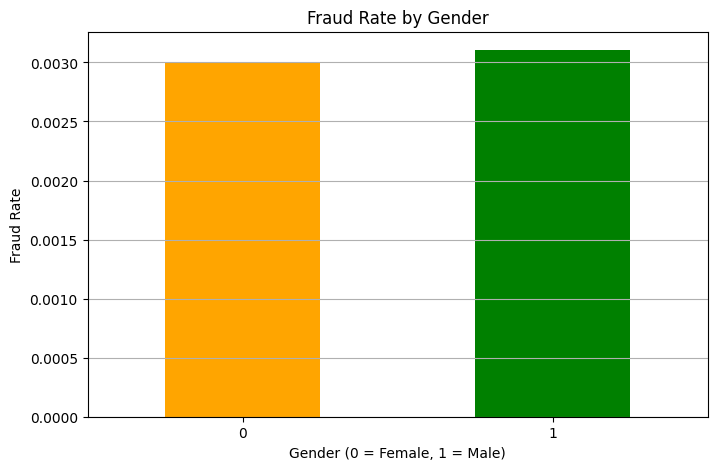

In [18]:
fraud_by_gender = data.groupby('gender')['is_fraud'].mean()

plt.figure(figsize=(8, 5))
fraud_by_gender.plot(kind='bar', color=['orange', 'green'])
plt.title('Fraud Rate by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Age Group Analysis : 
A box plot visualizes transaction amounts across different age groups.

<Figure size 1200x600 with 0 Axes>

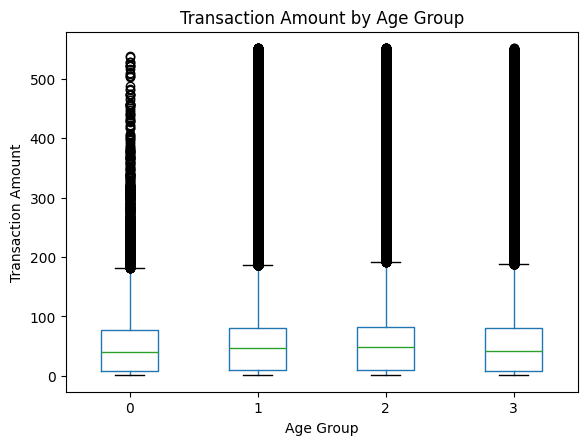

In [19]:
plt.figure(figsize=(12, 6))
data.boxplot(column='amt', by='age_group', grid=False)
plt.title('Transaction Amount by Age Group')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount')
plt.show()

Fraud Rate by Age Group : 
A bar chart to visualize fraud rates across different age groups.

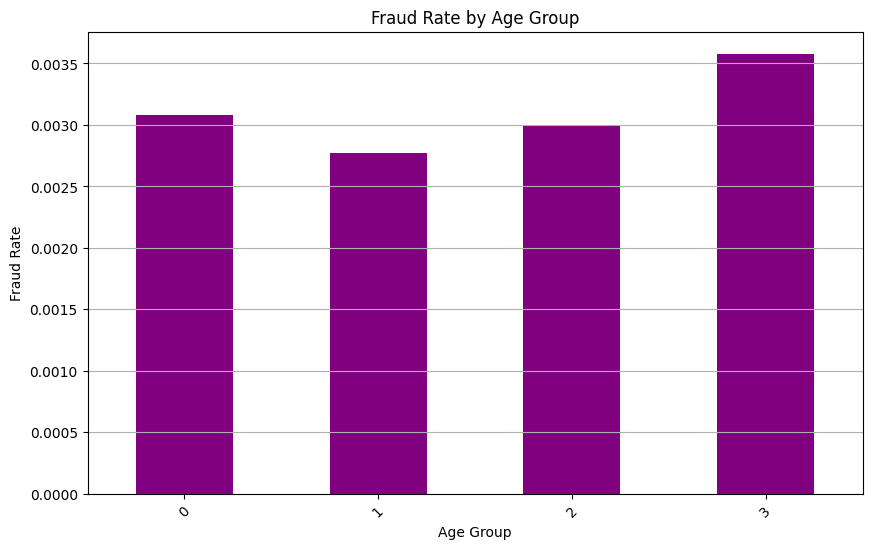

In [20]:
fraud_by_age_group = data.groupby('age_group')['is_fraud'].mean()

plt.figure(figsize=(10, 6))
fraud_by_age_group.plot(kind='bar', color='purple')
plt.title('Fraud Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Transactions Over Time : 
A line chart showing total transactions over time can help identify trends.

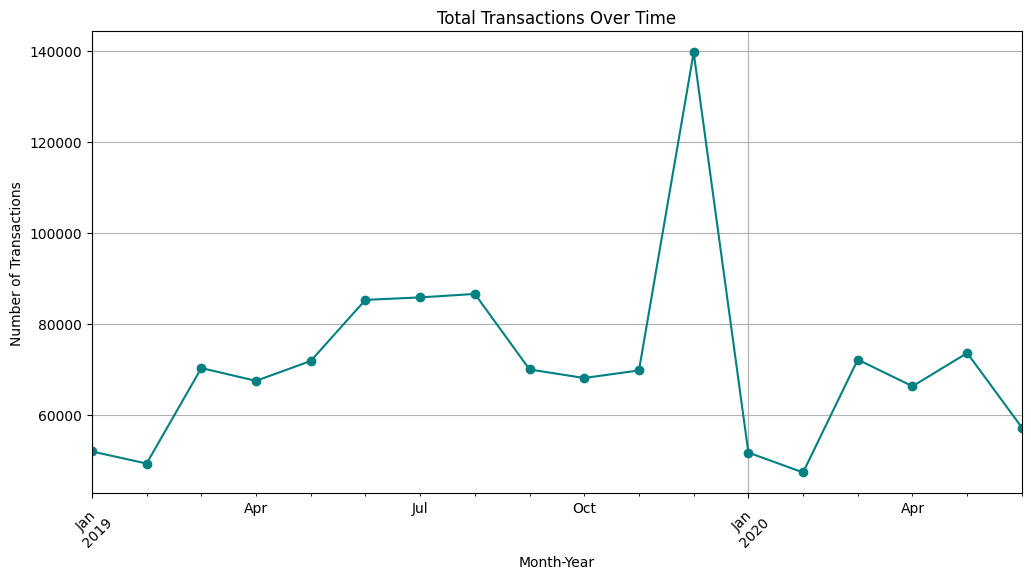

In [21]:
transactions_over_time = data.groupby(data['trans_date_trans_time'].dt.to_period("M")).size()

plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='line', marker='o', color='teal')
plt.title('Total Transactions Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Fraud Rate Over Time : 
A line chart to visualize how fraud rates change over time.

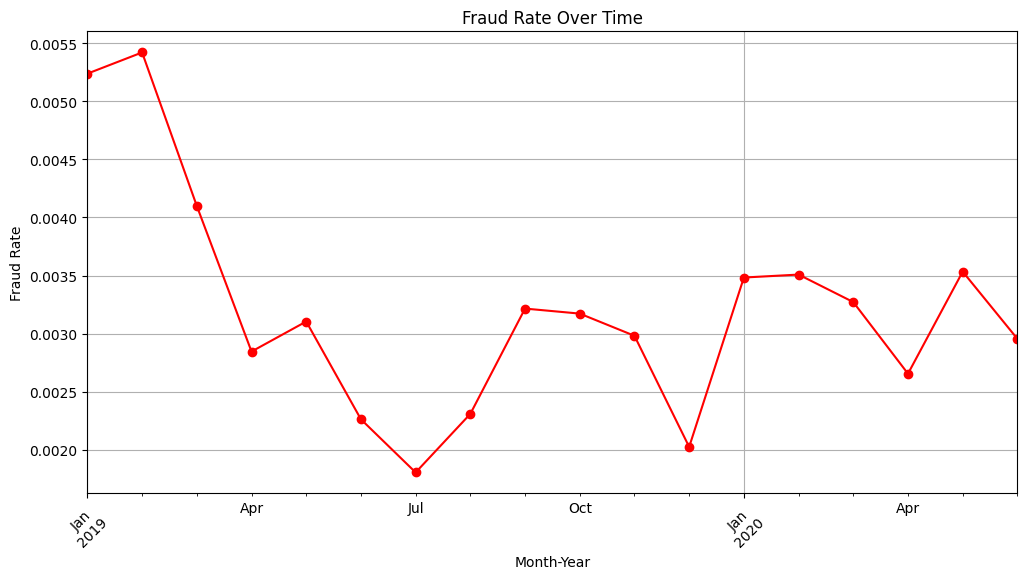

In [22]:
fraud_rate_over_time = data.groupby(data['trans_date_trans_time'].dt.to_period("M"))['is_fraud'].mean()

plt.figure(figsize=(12, 6))
fraud_rate_over_time.plot(kind='line', marker='o', color='red')
plt.title('Fraud Rate Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

City Population vs. Transaction Amount : 
A scatter plot can show the relationship between city population and transaction amounts.


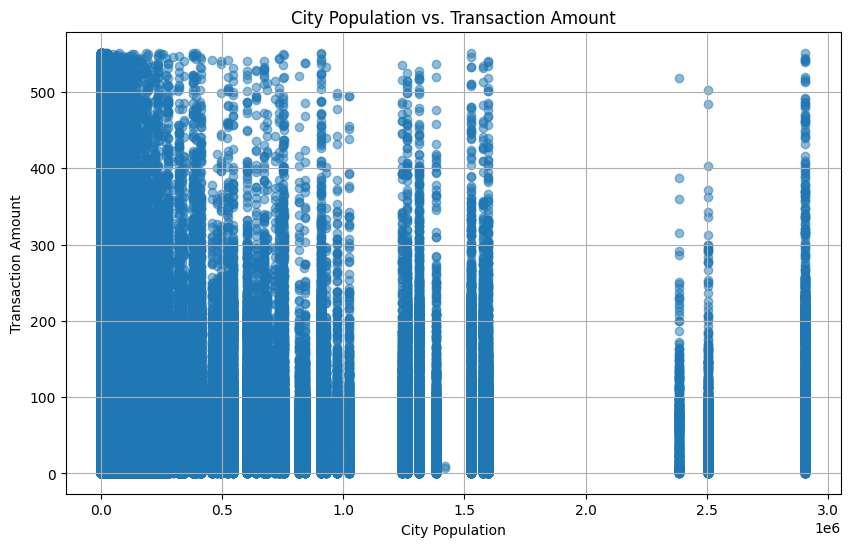

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(data['city_pop'], data['amt'], alpha=0.5)
plt.title('City Population vs. Transaction Amount')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.grid()
plt.show()

Correlation analysis:




The correlation values range from -1 to 1:

  1 indicates a perfect positive correlation.

  -1 indicates a perfect negative correlation.

  0 indicates no correlation.

Correlation Matrix:
                        trans_date_trans_time  category       amt    gender  \
trans_date_trans_time               1.000000  0.000180 -0.000285 -0.000961   
category                            0.000180  1.000000  0.030867 -0.028259   
amt                                -0.000285  0.030867  1.000000  0.001034   
gender                             -0.000961 -0.028259  0.001034  1.000000   
city_pop                           -0.001716  0.009386  0.005818 -0.028649   
dob                                 0.003659  0.003848  0.009748 -0.004976   
is_fraud                           -0.005041  0.020205  0.219404  0.007642   
trans_year                          0.783611 -0.000556  0.000842 -0.000654   
age                                 0.016730 -0.003862 -0.009724  0.004958   
age_group                           0.019209 -0.003054 -0.007999  0.010498   
Region                             -0.000157  0.006832 -0.000080 -0.003936   
is_weekend                         -0.00759

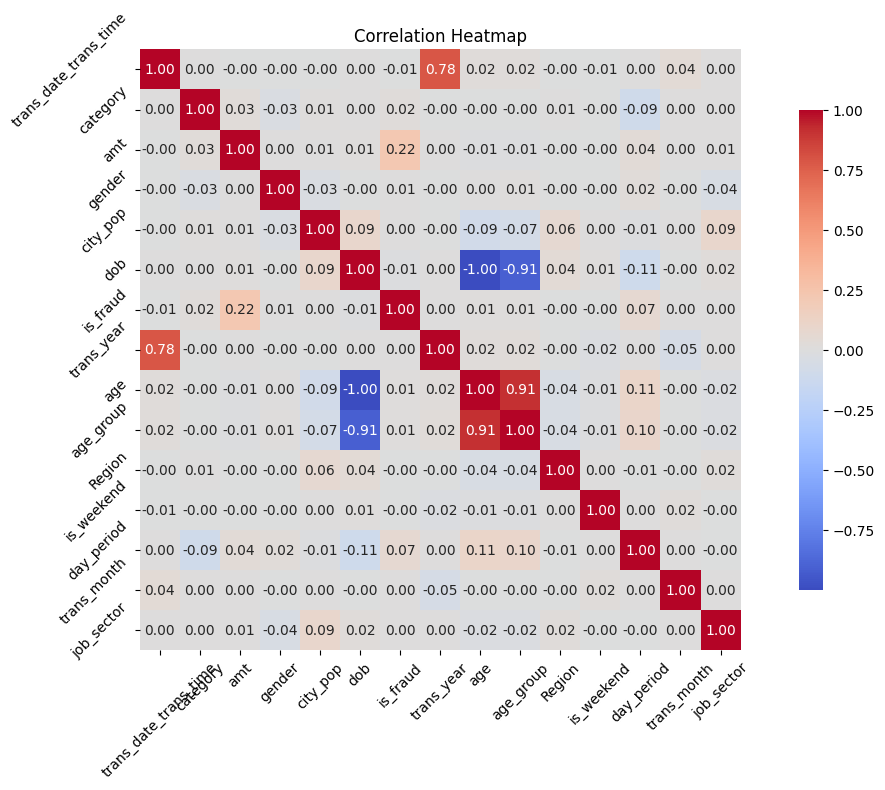

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cleaned_fraud_data2.csv')

# Convert 'trans_date_trans_time' to datetime if not already done
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()